# **LGMVIP Data Science Internship**

### **Author : Pravin Konasirasgi**

### **Advanced Level Task 1: Develop A Neural Network That Can Read Handwriting**

### **Algorithm used: Deep Learning: Convolutional Neural Network**

### **Language used: Python**

#### **Importing the libraries**

In [1]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers  import  Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#### **Loading data using Keras Dataset library**

In [2]:
(x_train,y_train),(x_test,y_test)=load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### **Changing data into Gray Scale**

In [15]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [4]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)
(60000,)
(10000,)


In [5]:
x_trains=x_train.astype('float32')/255.0
x_tests=x_test.astype('float32')/255.0
print(x_trains.shape)
print(x_tests.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


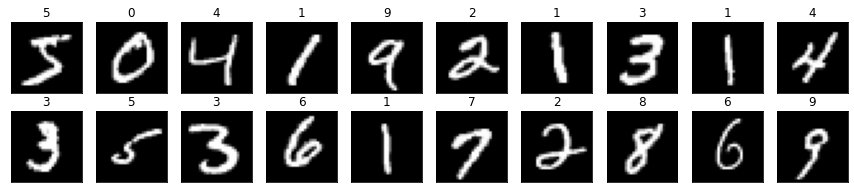

In [6]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [7]:
x=x_trains.shape[1:]

#### **Creating Model**

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="Softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [10]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_trains,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.3215 - accuracy: 0.8991 - val_loss: 0.0656 - val_accuracy: 0.9798
Epoch 2/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.1285 - accuracy: 0.9619 - val_loss: 0.0635 - val_accuracy: 0.9813
Epoch 3/10
1688/1688 [==============================] - 58s 35ms/step - loss: 0.0990 - accuracy: 0.9703 - val_loss: 0.0472 - val_accuracy: 0.9877
Epoch 4/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0800 - accuracy: 0.9766 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 5/10
1688/1688 [==============================] - 58s 35ms/step - loss: 0.0701 - accuracy: 0.9793 - val_loss: 0.0467 - val_accuracy: 0.9865
Epoch 6/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0445 - val_accuracy: 0.9878
Epoch 7/10
1688/1688 [==============================] - 60s 36ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0509 -

#### **Plotting Accuracy of Model**

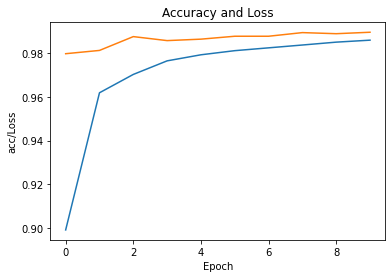

In [11]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

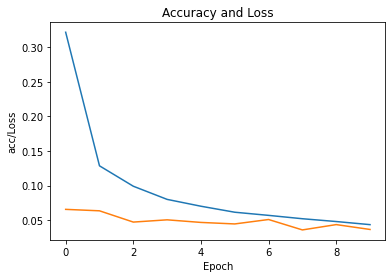

In [12]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

#### **Testing Our Model**

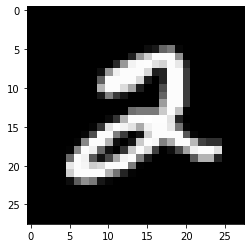

In [13]:
image=x_trains[5]
plt.imshow(np.squeeze(image),cmap="gray")

In [14]:
image=image.reshape(-1,28,28,1)
pred=model.predict([image])
np.argmax(pred)

2

### **Thank You**